# Optinal Programming Assignment

## Submitted by:

### KULDEEP BHURABHAI VADHIYA, kuldeepb, 50496532
### YASH MADHUKAR PATIL, yashmadh, 50495125

### Dataset: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Loading the Libraries

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

## Loading the Data

In [4]:
df = pd.read_csv('WELFake_Dataset.csv')

## Knowing the Data

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [7]:
df.shape

(72134, 4)

## Checking Null Values

In [8]:
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [9]:
df.dropna(inplace=True) # Dropping null values because there are very less compared to whole data
df.shape

(71537, 4)

In [10]:
df['merged_text'] = df['title'] + df['text'] # Merging the Columns title and text as merged_text
df.head()

,Unnamed: 0,title,text,label,merged_text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...


## Visualizing the Counts of Real and Fake News

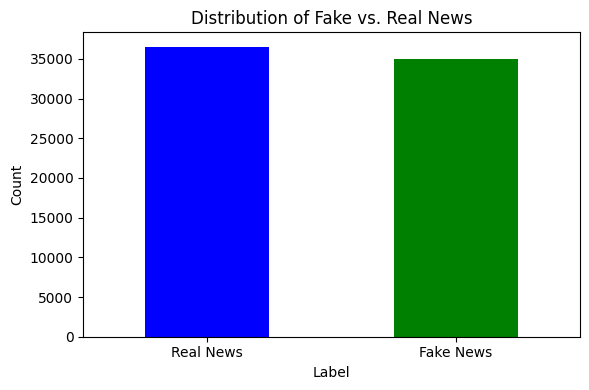

In [11]:
labels_count = df['label'].value_counts()
plt.figure(figsize=(6, 4))
labels_count.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Fake vs. Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Real News', 'Fake News'], rotation=0) 
plt.tight_layout()
plt.show()

### We can observe from the graph that Number of Real News and Fake News are almost same. So, the data is not skewed.

## Splitting the data for Modelling

In [12]:
X, y = df['merged_text'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Vectorising the Data for Modelling

In [13]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Naive Bayes Model

In [14]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

y_pred_nb = naive_bayes_model.predict(X_test_tfidf)

In [15]:
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
cm = confusion_matrix(y_test, y_pred_nb)

In [16]:
print('***Naive Bayes***\n')
print(f'Accuracy: {round(accuracy,4)}')
print(f'Precision: {round(precision,4)}')
print(f'Recall: {round(recall,4)}')
print(f'F1-score: {round(f1,4)}')
print(f'Confusion matrix:\n {cm}')

***Naive Bayes***

Accuracy: 0.8725
Precision: 0.8733
Recall: 0.8745
F1-score: 0.8739
Confusion matrix:
 [[6164  917]
 [ 907 6320]]


## Decision Tree Model

In [21]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)

y_pred_dt = decision_tree_model.predict(X_test_tfidf)

In [22]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

In [24]:
print('*** Decision Tree ***\n')
print(f'Accuracy: {round(accuracy,4)}')
print(f'Precision: {round(precision,4)}')
print(f'Recall: {round(recall,4)}')
print(f'F1-score: {round(f1,4)}')
print(f'Confusion matrix:\n {cm}')

*** Decision Tree ***

Accuracy: 0.9314
Precision: 0.92
Recall: 0.9465
F1-score: 0.933
Confusion matrix:
 [[6486  595]
 [ 387 6840]]


## Random Forest Model

In [17]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

In [18]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

In [19]:
print('*** Random Forest ***\n')
print(f'Accuracy: {round(accuracy,4)}')
print(f'Precision: {round(precision,4)}')
print(f'Recall: {round(recall,4)}')
print(f'F1-score: {round(f1,4)}')
print(f'Confusion matrix:\n {cm}')

*** Random Forest ***

Accuracy: 0.9333
Precision: 0.9241
Recall: 0.9456
F1-score: 0.9348
Confusion matrix:
 [[6520  561]
 [ 393 6834]]


## Summary: 

### I have run 3 models that is Naive Bayes Model, Decision Tree Model and Random Forest Model out of which Random Forest has the best accuracy that is 93.33% and Decision Tree has 93.14% accuracy and all the metrics are almost same for Random Forest and Decision Tree. So, we can choose either of them but better is always Random Forest.